In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'data/amplitude_simulations/'

[0.82462071 0.82477867 0.82493658 ... 0.72611964 0.72630528 0.72649087]


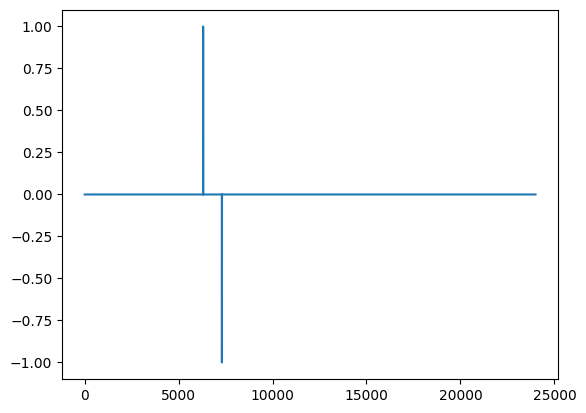

[0.89780344 0.89766057 0.89751764 ... 0.94851184 0.94839883 0.94828575]


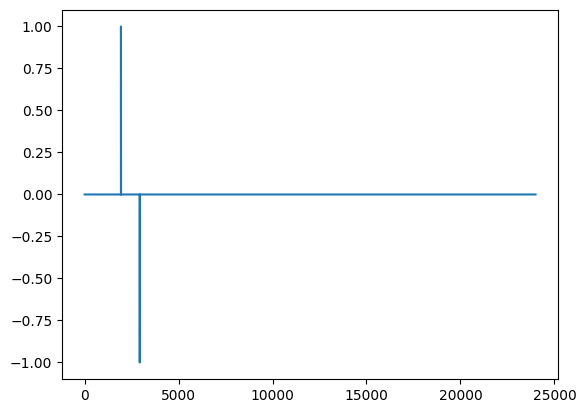

[0.53273852 0.53249299 0.53224743 ... 0.59663205 0.59639713 0.59616217]


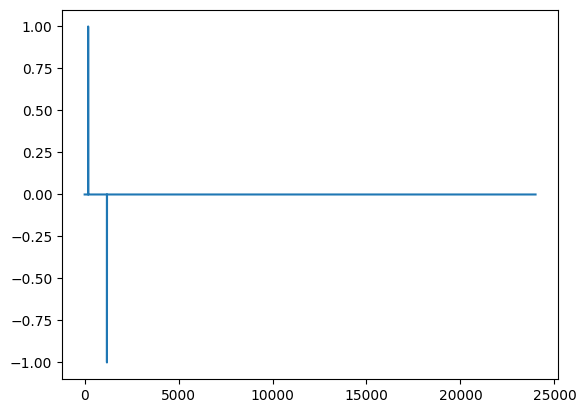

[0.36173376 0.36152075 0.36130772 ... 0.40064793 0.40043978 0.40023159]


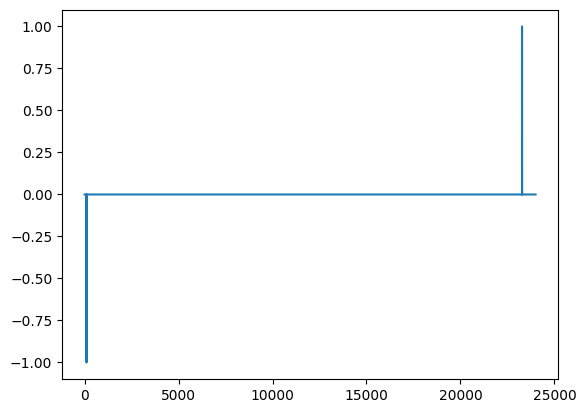

[0.13448802 0.13419163 0.13389525 ... 0.17305308 0.17275688 0.17246067]


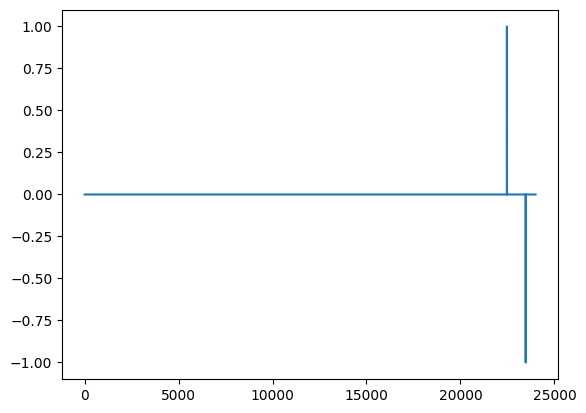

[-0.49779548 -0.49805227 -0.49830902 ... -0.49429124 -0.49454851
 -0.49480575]


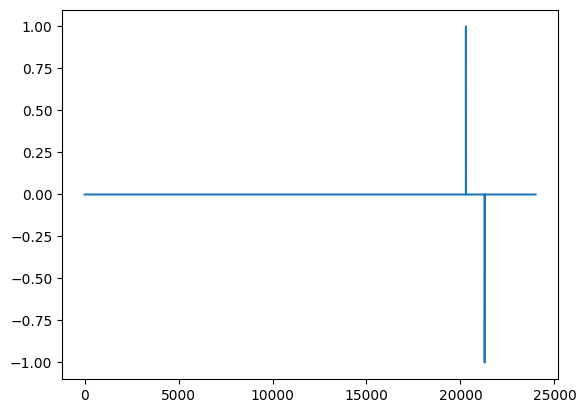

[-0.81649623 -0.81669457 -0.81689287 ... -0.82479013 -0.82498629
 -0.8251824 ]


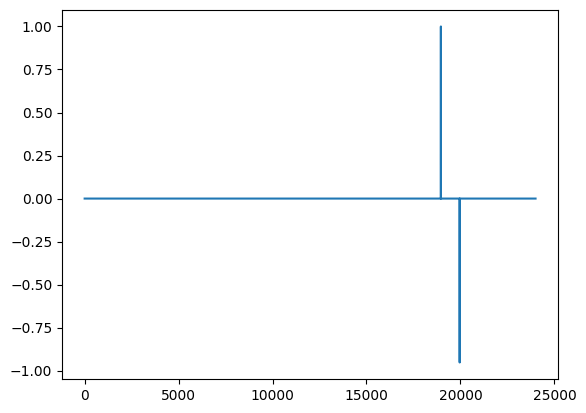

[-0.92192018 -0.92208898 -0.92225771 ... -0.92778835 -0.92795513
 -0.92812185]


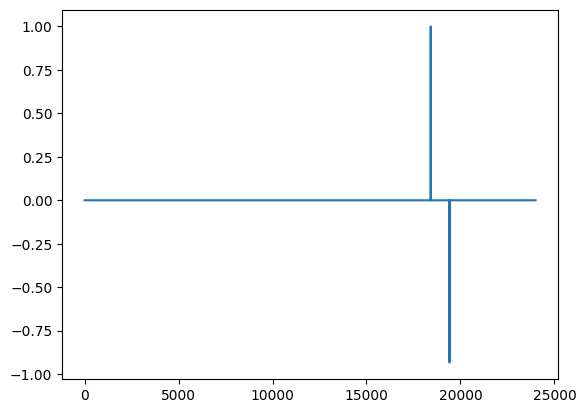

[-0.95811454 -0.95827146 -0.95842831 ... -0.96122058 -0.96137629
 -0.96153193]


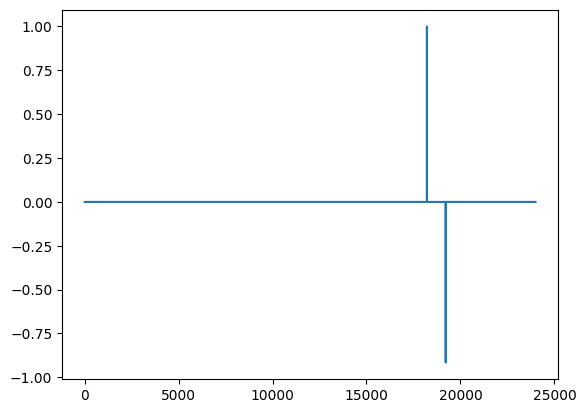

In [ ]:
baseline_lux_values = np.array([0, 25, 50, 75, 100, 250, 500, 750, 1000], dtype=float)
pulse_at_values = np.linspace(0, 14, 9)

simulation_days = 20
dt = 0.001
last_day_start = int((simulation_days - 1) * 24 / dt)
day_length_in_idx = int(24.0 / dt) - 1

# TODO: Need to solve getting the pulse end when the pulse is at the linear decay part of the light

for baseline_lux in baseline_lux_values:
    for pulse_at in pulse_at_values:
        # sol, sleep_history, light_history, dt, num_days = run_model(baseline_lux)
        # np.savez(f'{save_path}baseline_{baseline_lux}_pulse_at_{pulse_at}.npz', sol=sol, sleep_history=sleep_history, light_history=light_history, dt=dt, num_days=num_days)
        data = np.load(f'{data_path}baseline_{baseline_lux}_pulse_at_{pulse_at}.npz')
        sol = data['sol']
        # Calculate amplitude after pulse
        x_last_day = sol[0, last_day_start:]
        xc_last_day = sol[1, last_day_start:]
        print(x_last_day)
        amplitude_last_day = np.sqrt(x_last_day ** 2 + xc_last_day ** 2)
        # Calculate when light pulse ends
        # light pulse reaches the max value of light_history
        light_history = data['light_history']
        # make 0 everything belo 0.75 max
        light = light_history[last_day_start::]
        light = light / np.max(light)
        light[light < 0.75] = 0
        # find times when signal switches to 0
        light_diff = np.diff(light)
        light_diff = np.append(0, light_diff)

        # light_diff[light_diff > 0] = 0
        # light_diff[light_diff < -0.75] = 1
        # light_diff[light_diff >= -0.75] = 0

        # get the last argmax
        last_pulse_end = np.argmax(light_history[last_day_start::][::-1])
        last_pulse_end = day_length_in_idx - last_pulse_end

        # plt.plot(amplitude_last_day)
        # plt.plot(light)
        plt.plot(light_diff)
        # plt.axvline(last_pulse_end, color='r')
        plt.show()
        break